In [1]:
import numpy as np
import pandas as pd
import cv2
from matplotlib import pyplot as plt
import matplotlib.cm as cm
import matplotlib.gridspec as gridspec
from pylab import imread
from skimage.color import rgb2gray
import pywt
import pywt.data
from pywt import dwt2, idwt2
from pywt._doc_utils import wavedec2_keys, draw_2d_wp_basis

In [2]:
def ShowImage(ImageList, nRows = 1, nCols = 2, WidthSpace = 0.00, HeightSpace = 0.00):

    from matplotlib import pyplot as plt
    import matplotlib.gridspec as gridspec
    
    gs = gridspec.GridSpec(nRows, nCols)
    gs.update(wspace=WidthSpace, hspace=HeightSpace) # set the spacing between axes.
    plt.figure(figsize=(20,10))
    for i in range(len(ImageList)):
        ax1 = plt.subplot(gs[i])
        ax1.set_xticklabels([])
        ax1.set_yticklabels([])
        ax1.set_aspect('equal')
        plt.subplot(nRows, nCols,i+1)
        image = ImageList[i].copy()
        if (len(image.shape) < 3):
            plt.imshow(image, plt.cm.gray)
        else:
            plt.imshow(image)
            plt.title("Image " + str(i))
            plt.axis('off')
    plt.show()

/home/qbao/anaconda3/lib/python3.7/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


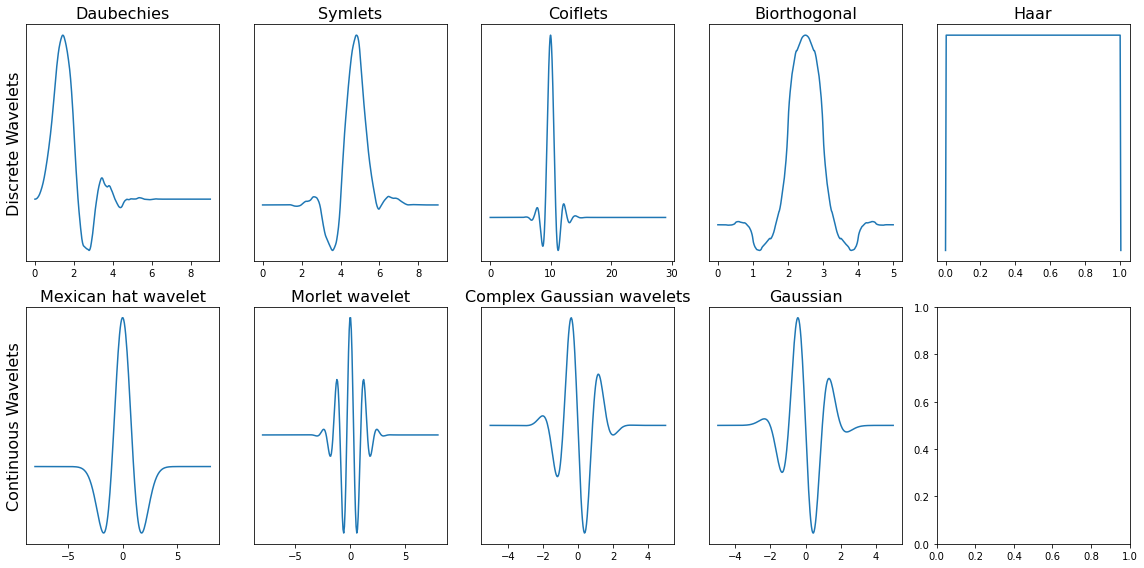

In [3]:

    discrete_wavelets = ['db5', 'sym5', 'coif5', 'bior1.3', 'haar']
    continuous_wavelets = ['mexh', 'morl', 'cgau5', 'gaus5']

    list_list_wavelets = [discrete_wavelets, continuous_wavelets]
    list_funcs = [pywt.Wavelet, pywt.ContinuousWavelet]

    fig, axarr = plt.subplots(nrows=2, ncols=5, figsize=(16,8))
    for ii, list_wavelets in enumerate(list_list_wavelets):
        func = list_funcs[ii]
        row_no = ii
        for col_no, waveletname in enumerate(list_wavelets):
            wavelet = func(waveletname)
            family_name = wavelet.family_name
            biorthogonal = wavelet.biorthogonal
            orthogonal = wavelet.orthogonal
            symmetry = wavelet.symmetry
            if ii == 0:
                _ = wavelet.wavefun()
                wavelet_function = _[0]
                x_values = _[-1]
            else:
                wavelet_function, x_values = wavelet.wavefun()
            if col_no == 0 and ii == 0:
                axarr[row_no, col_no].set_ylabel("Discrete Wavelets", fontsize=16)
            if col_no == 0 and ii == 1:
                axarr[row_no, col_no].set_ylabel("Continuous Wavelets", fontsize=16)
            axarr[row_no, col_no].set_title("{}".format(family_name), fontsize=16)
            axarr[row_no, col_no].plot(x_values, wavelet_function)
            axarr[row_no, col_no].set_yticks([])
            axarr[row_no, col_no].set_yticklabels([])
    
    plt.tight_layout()
    plt.show()

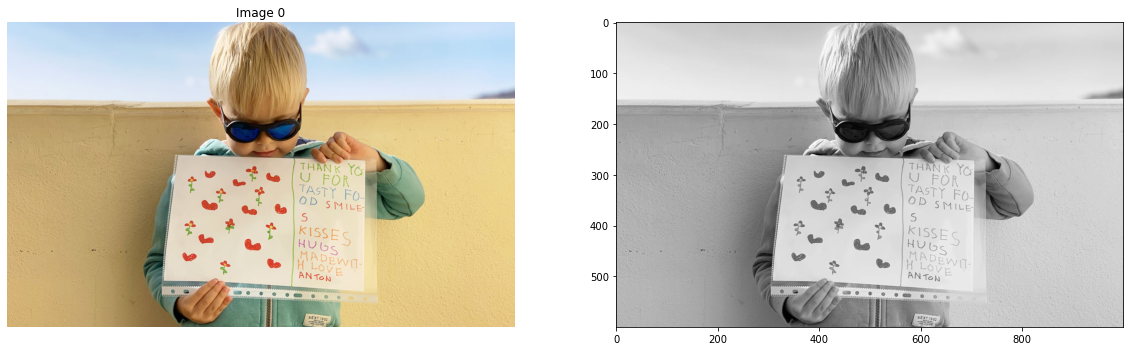

In [4]:
# Read Image

image_color = imread("Sample05/drawing.jpg")
# Convert Image into Gray
image_gray = cv2.cvtColor(image_color, cv2.COLOR_RGB2GRAY)
# Display Image
ShowImage([image_color, image_gray], 1, 2)

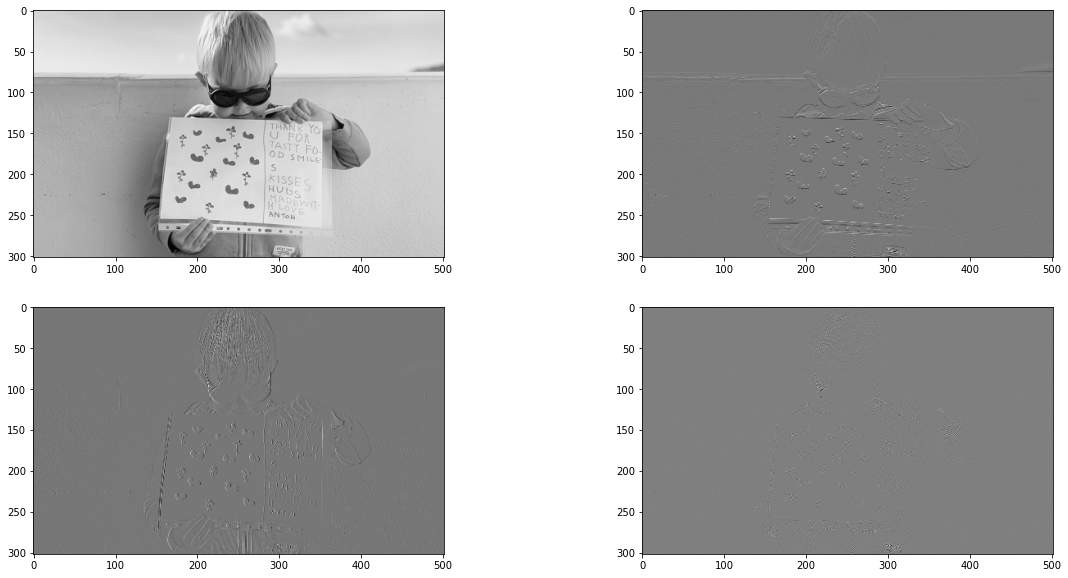

In [5]:
import pywt
import pywt.data
from pywt import dwt2, idwt2
# Wavelet transform of image, and plot approximation and details
titles = ['Approximation', ' Horizontal detail',
'Vertical detail', 'Diagonal detail']
coeffs2 = dwt2(image_gray, discrete_wavelets[3])
LL, (LH, HL, HH) = coeffs2
# Display Image
ShowImage([LL, LH, HL, HH], 2, 2)


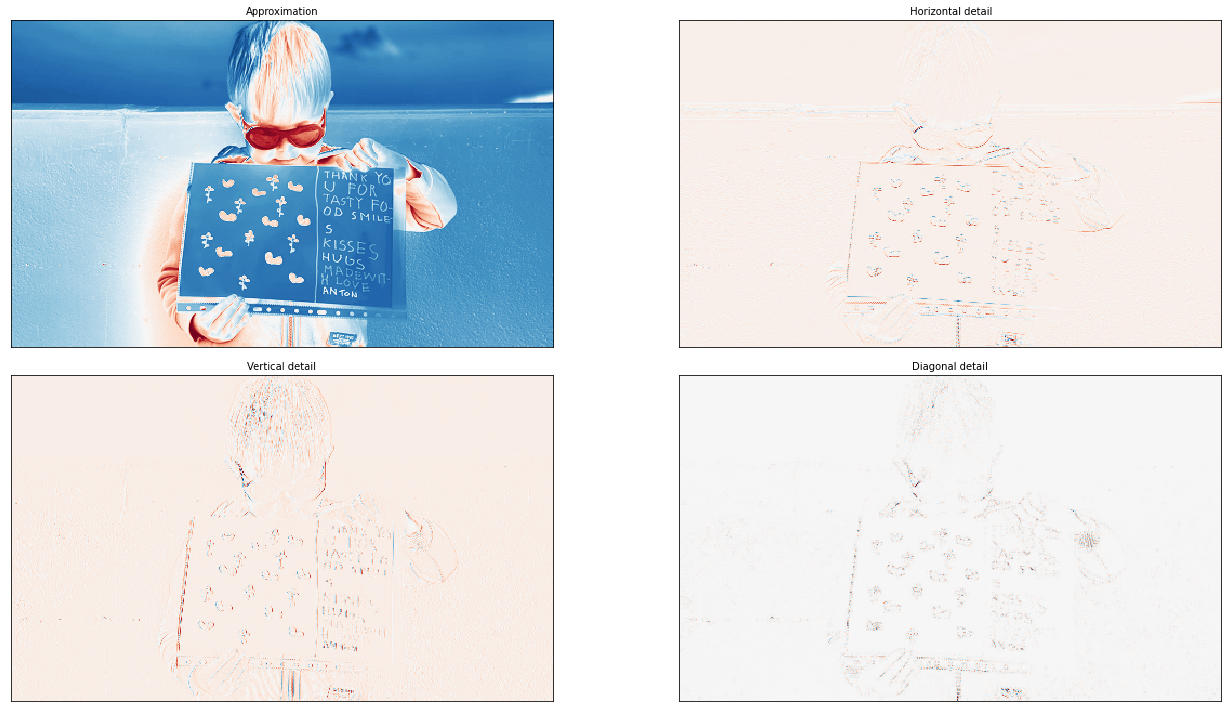

In [6]:
cmapList = [cm.gray, cm.jet, cm.rainbow, cm.viridis, cm.cubehelix, cm.RdBu]

fig = plt.figure(figsize=(20,10))
for i, a in enumerate([LL, LH, HL, HH]):
    ax = fig.add_subplot(2, 2, i + 1)
    ax.imshow(a, interpolation="nearest", cmap=cmapList[5])
    ax.set_title(titles[i], fontsize=10)
    ax.set_xticks([])
    ax.set_yticks([])
fig.tight_layout()
plt.show()

# Bài 1

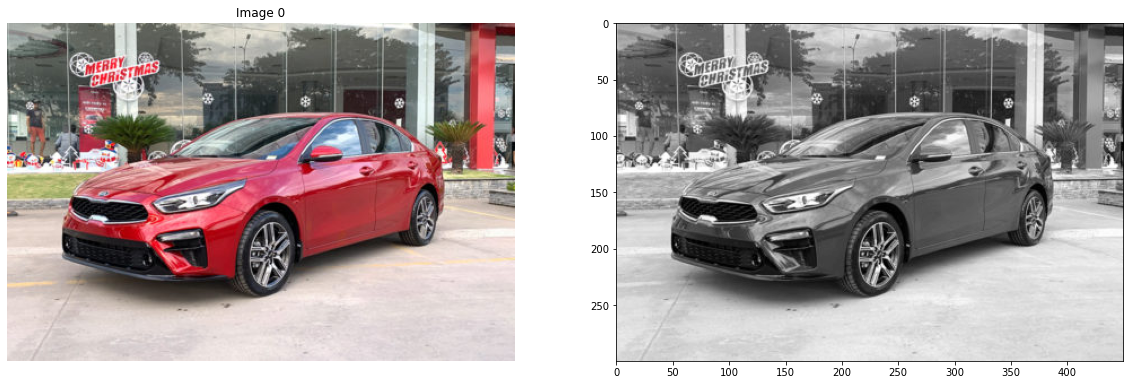

In [17]:
# Read Image

image_color = imread("Sample05/car.jpg")
# Convert Image into Gray
image_gray = cv2.cvtColor(image_color, cv2.COLOR_RGB2GRAY)
# Display Image
ShowImage([image_color, image_gray], 1, 2)

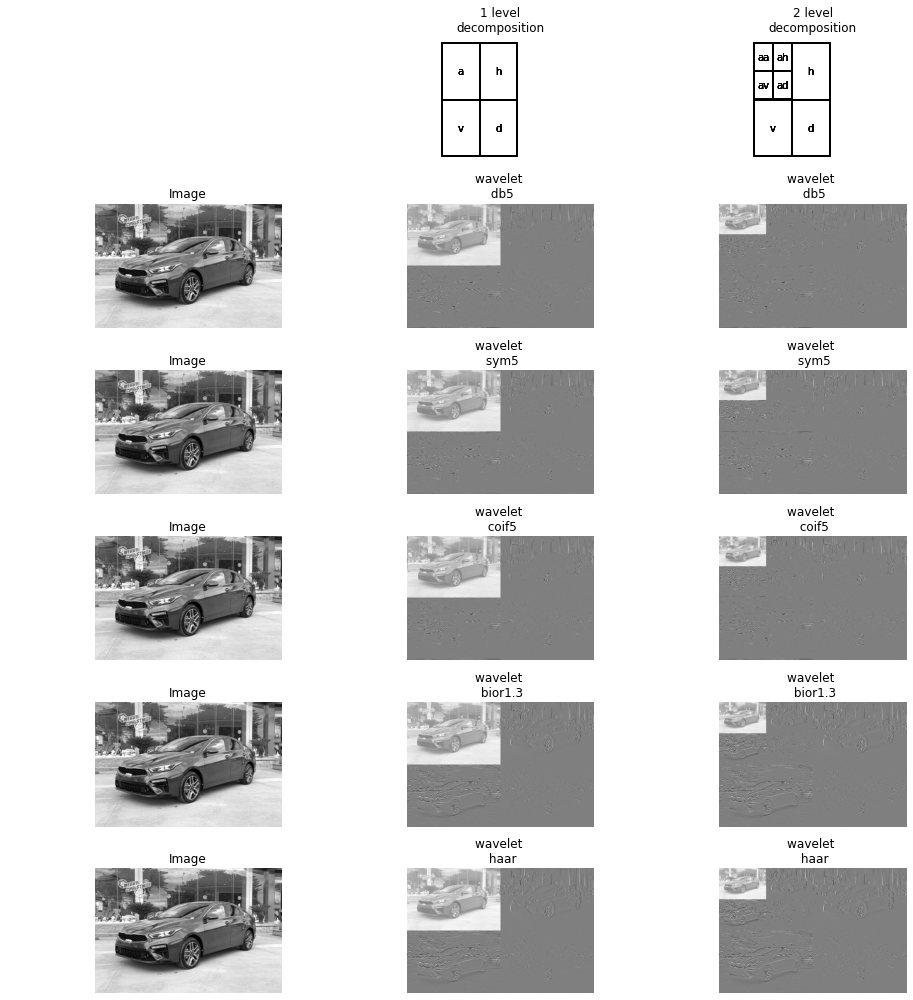

In [18]:
from pywt._doc_utils import wavedec2_keys, draw_2d_wp_basis
discrete_wavelets = ['db5', 'sym5', 'coif5', 'bior1.3', 'haar']

x = image_gray.astype(np.float32)
shape = x.shape

max_lev = 2 # how many levels of decomposition to draw
label_levels = 2 # how many levels to explicitly label on the plots

fig, axes = plt.subplots(6,3 , figsize=(14, 14))
for i,name_wavelet in zip(range(1,6),discrete_wavelets):
    for level in range(0, max_lev + 1):
        if level == 0:
            # show the original image before decomposition
            axes[0, 0].set_axis_off()
            axes[i, 0].imshow(x, cmap=plt.cm.gray)
            axes[i, 0].set_title('Image')
            axes[i, 0].set_axis_off()
            continue
            
        # plot subband boundaries of a standard DWT basis
        draw_2d_wp_basis(shape, wavedec2_keys(level), ax=axes[0, level],
                        label_levels=label_levels)
        axes[0, level].set_title('{} level\ndecomposition'.format(level))
        
        # compute the 2D DWT
        c = pywt.wavedec2(x, name_wavelet, mode='periodization', level=level)
        # normalize each coefficient array independently for better visibility
        c[0] /= np.abs(c[0]).max()
        for detail_level in range(level):
            c[detail_level + 1] = [d/np.abs(d).max() for d in c[detail_level + 1]]
        # show the normalized coefficients
        arr, slices = pywt.coeffs_to_array(c)
        axes[i, level].imshow(arr, cmap=plt.cm.gray)
        axes[i, level].set_title('wavelet \n {}'.format(name_wavelet))
        axes[i, level].set_axis_off()

plt.tight_layout()
plt.show()

# bài 2


In [19]:

def wavelet(Image,name_wavelet = 'bior1.3',level = None):
    """
    Image: image gray need wavelet
    name_wavelet = ('db5','sym5', 'coif5', 'bior1.3', 'haar') default = bior1.3.
    level : int, optional
    Decomposition level (must be > 0). If level is None (default) then it
    will be calculated using the ``dwt_max_level`` function.
    """
    x = Image.astype(np.float32)

    # compute the 2D DWT
    c = pywt.wavedec2(x, name_wavelet, mode='periodization', level=level)

    # Wavelet transform of image, and plot approximation and details
    titles = ['Approximation', ' Horizontal detail',
     'Vertical detail', 'Diagonal detail']
#     coeffs2 = dwt2(Image, name_wavelet)
    LL, (LH, HL, HH) = c[0],c[level]

    
    cmapList = [cm.gray, cm.jet, cm.rainbow, cm.viridis, cm.cubehelix, cm.RdBu]
    fig = plt.figure(figsize=(20,10))
    for i, a in enumerate([LL, LH, HL, HH]):
        ax = fig.add_subplot(2, 2, i + 1)
        ax.imshow(a, interpolation="nearest", cmap=cmapList[5])
        ax.set_title(titles[i], fontsize=20)
        ax.set_xticks([])
        ax.set_yticks([])
    
    fig.tight_layout()
    plt.show()

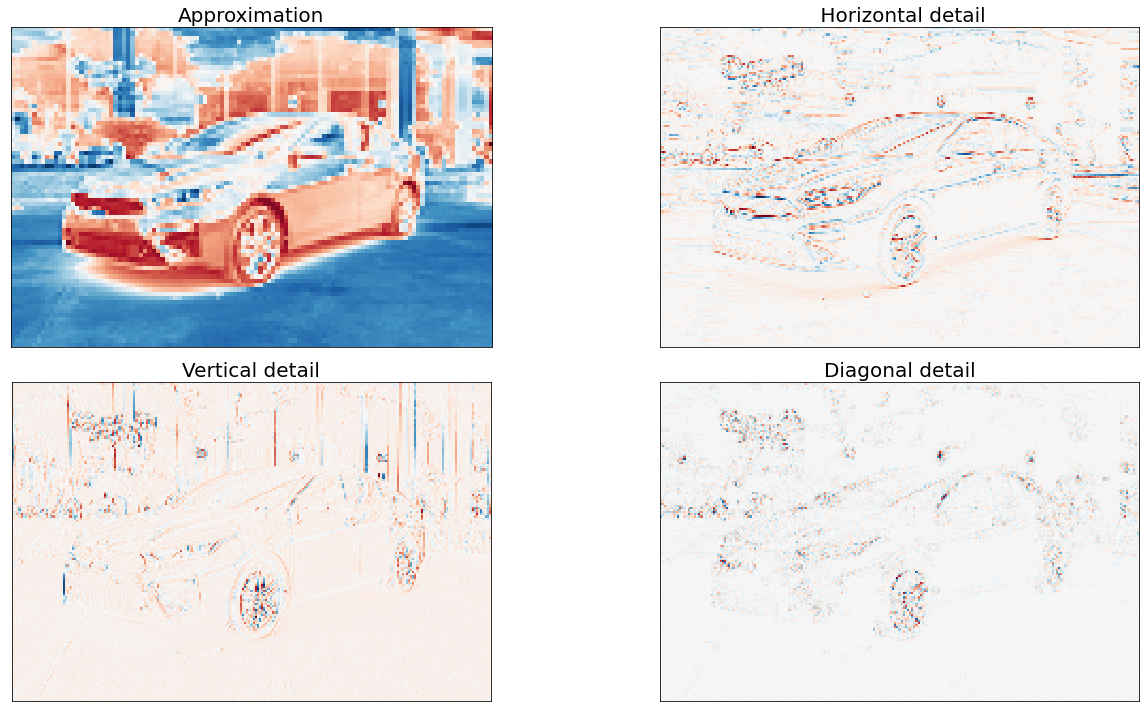

In [20]:
wavelet(image_gray,level=2)

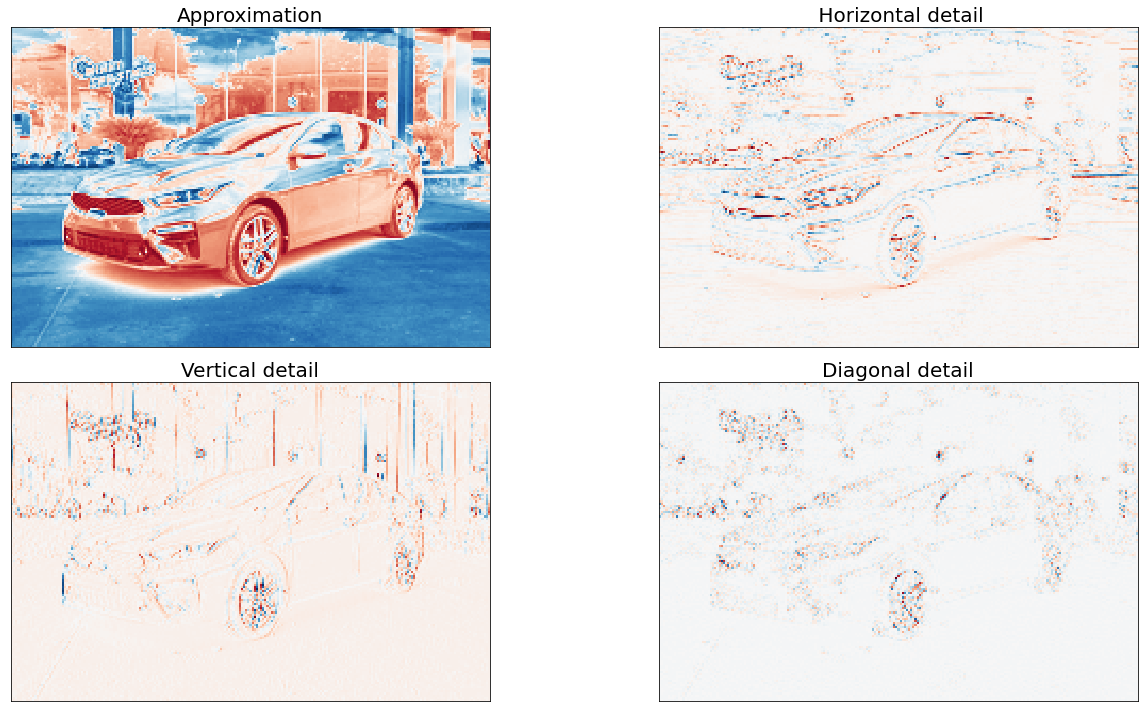

In [21]:
wavelet(image_gray,level=1)

# Bài 3

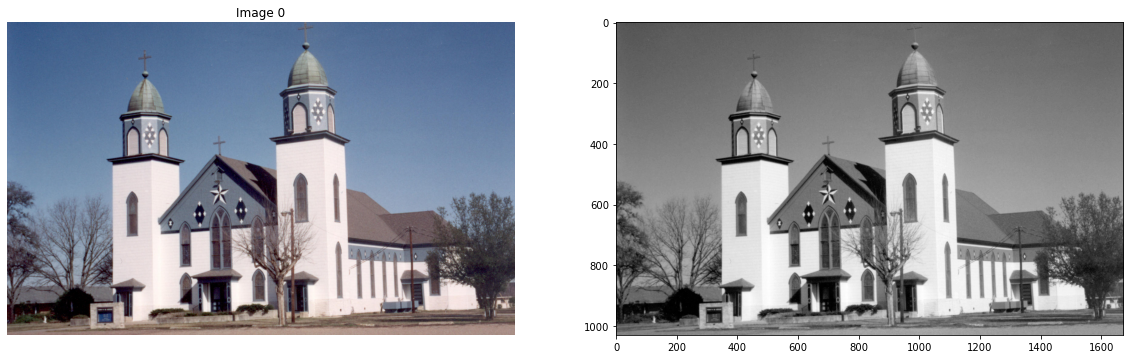

In [12]:
# Read Image

image_color = imread("Sample05/church.jpg")
# Convert Image into Gray
image_gray = cv2.cvtColor(image_color, cv2.COLOR_RGB2GRAY)
# Display Image
ShowImage([image_color, image_gray], 1, 2)

### Khôi phục ảnh gốc từ ảnh detail và ảnh approximation

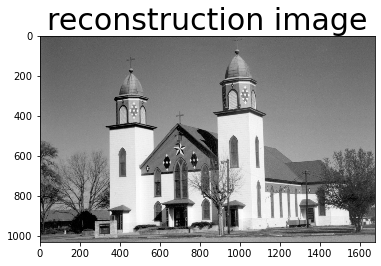

In [13]:
coeffs = pywt.wavedec2(image_gray, 'bior1.3', mode='periodization', level=2)
image = pywt.waverec2(coeffs, 'bior1.3', mode='periodization')
plt.imshow(image,interpolation="nearest",cmap=plt.cm.gray)
plt.title('reconstruction image',fontsize=30)
plt.show()

### Xóa thông tin ảnh horizontal detail và khôi phục lại ảnh từ ảnh approximation và các ảnh detail còn lạ

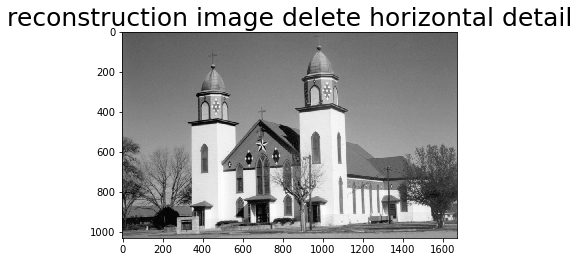

In [14]:

coeffs = dwt2(image_gray, 'bior1.3', mode='sym')
LL, (LH, HL, HH) = coeffs
LH = np.zeros_like(LH)
image = idwt2((LL,(LH,HL,HH)), 'bior1.3')
plt.imshow(image,interpolation="nearest",cmap=plt.cm.gray)
plt.title('reconstruction image delete horizontal detail',fontsize=25)
plt.show()

### Xóa thông tin ảnh vertical detail và khôi phục lại ảnh từ ảnh approximation và các ảnh detail còn lạ

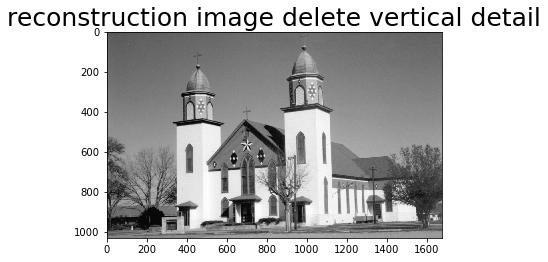

In [15]:

coeffs = dwt2(image_gray, 'bior1.3', mode='sym')
LL, (LH, HL, HH) = coeffs
HL = np.zeros_like(HL)
image = idwt2((LL,(LH,HL,HH)), 'bior1.3')
plt.imshow(image,interpolation="nearest",cmap=plt.cm.gray)
plt.title('reconstruction image delete vertical detail',fontsize=25)
plt.show()

### Xóa thông tin ảnh diagontal detail và khôi phục lại ảnh từ ảnh approximation và các ảnh detail còn lạ

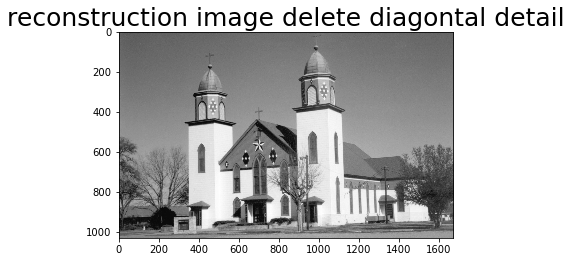

In [16]:

coeffs = dwt2(image_gray, 'bior1.3', mode='sym')
LL, (LH, HL, HH) = coeffs
HH = np.zeros_like(HH)
image = idwt2((LL,(LH,HL,HH)), 'bior1.3')
plt.imshow(image,interpolation="nearest",cmap=plt.cm.gray)
plt.title('reconstruction image delete diagontal detail',fontsize=25)
plt.show()